# Invasive Ductal Cancer

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

from PIL import Image, ImageDraw # encode into a bytesIO and #decode
from io import StringIO, BytesIO
import requests
import base64


In [16]:
X = np.load('../raw_data/X.npy')
Y = np.load('../raw_data/Y.npy')

In [18]:
png = Image.open('../raw_data/doi_10/CINJ_imgs_idx5/10253_idx5.png') 

In [23]:
np_fullsize = np.array(png)

In [16]:
neg = X[Y==0]
pos = X[Y==1]

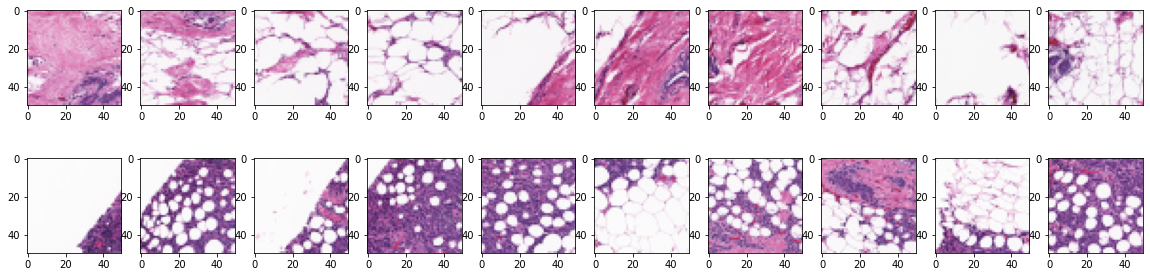

In [17]:
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(neg[i])
    plt.subplot(2, n, n + i + 1)
    plt.imshow(pos[i])


In [106]:
X[0].dtype

dtype('uint8')

# Post request with a 50ps image

In [240]:
bytes_image = base64.b64encode(X[0])

url = 'http://127.0.0.1:8000/predict'
response = requests.post(url,data={'file':bytes_image})

In [236]:
# response.json()

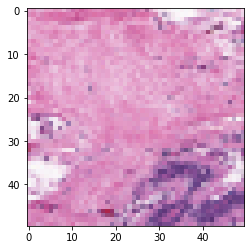

In [237]:
image_decoded = base64.b64decode(response.json())

long_array = np.frombuffer(image_decoded, dtype=np.uint8)
long_array.shape
image_as_array = np.reshape(long_array,(50,50,3))
plt.imshow(image_as_array)

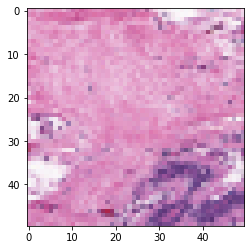

In [219]:
plt.imshow(X[0])

In [26]:
np_fullsize

array([[[253, 254, 253],
        [253, 254, 253],
        [253, 254, 253],
        ...,
        [253, 253, 252],
        [253, 253, 252],
        [252, 253, 252]],

       [[253, 254, 253],
        [253, 254, 253],
        [253, 254, 253],
        ...,
        [253, 253, 252],
        [253, 253, 252],
        [252, 253, 252]],

       [[253, 254, 253],
        [253, 254, 253],
        [253, 254, 253],
        ...,
        [253, 253, 252],
        [253, 253, 252],
        [252, 253, 252]],

       ...,

       [[248, 248, 248],
        [248, 248, 248],
        [247, 248, 248],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[248, 248, 248],
        [248, 248, 248],
        [247, 248, 248],
        ...,
        [244, 245, 245],
        [244, 245, 245],
        [244, 245, 245]],

       [[248, 247, 248],
        [247, 247, 248],
        [247, 247, 248],
        ...,
        [244, 245, 245],
        [245, 245, 245],
        [245, 245, 245]]